# Sentiment Analysis of Twitter Data using Traditional NLP models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
tsaDF = pd.read_csv('../data/Twitter_Data.csv')
tsaDF.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
tsaDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [4]:
sample_df = tsaDF.sample(2000, random_state=42)
sample_df.head()

,textID,text,selected_text,sentiment
1588,a7f72a928a,WOOOOOOOOOO are you coming to Nottingham at...,t? lovelovelove,positive
23879,ef42dee96c,resting had a whole day of walking,resting had a whole day of walking,neutral
6561,07d17131b1,"was in Palawan a couple of days ago, i`ll try ...","was in Palawan a couple of days ago, i`ll try ...",neutral
2602,2820205db5,I know! I`m so slow its horrible. DON`T TELL ...,horrible.,negative
4003,7d3ce4363c,"Glad I went out, glad I didn`t leave early, an...",glad,positive


Check Data balance

In [5]:
sample_df['sentiment'].value_counts()

sentiment
neutral     819
positive    615
negative    566
Name: count, dtype: int64

In [6]:
sample_df.reset_index(drop=True, inplace=True)

### NLP Preprocessing

In [7]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SkyTushar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SkyTushar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SkyTushar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
stop_words = [word for word in stopwords.words('english') if word not in {'not', 'no', 'nor'}]
lemma = WordNetLemmatizer()

In [9]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Convert to lowercase
    return text.lower()

In [10]:
def preprocess_text(text):

    cleaned_text = clean_text(text)

    # Tokenize the text
    tokens = word_tokenize(cleaned_text)
    
    # Lemmatize the tokens
    lemmatized_tokens = [lemma.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(lemmatized_tokens)

In [11]:
sample_df

,textID,text,selected_text,sentiment
0,a7f72a928a,WOOOOOOOOOO are you coming to Nottingham at...,t? lovelovelove,positive
1,ef42dee96c,resting had a whole day of walking,resting had a whole day of walking,neutral
2,07d17131b1,"was in Palawan a couple of days ago, i`ll try ...","was in Palawan a couple of days ago, i`ll try ...",neutral
3,2820205db5,I know! I`m so slow its horrible. DON`T TELL ...,horrible.,negative
4,7d3ce4363c,"Glad I went out, glad I didn`t leave early, an...",glad,positive
...,...,...,...,...
1995,3521fb0d31,as long as you have someone to make out with...,as long as you have someone to make out with,neutral
1996,d2c5776638,_one Could use GarageBand though it`s probably...,overkill.,negative
1997,d8209d4314,wow their is no pancake mix,wow their is no pancake mix,neutral
1998,cfdbb7f29e,Sensation Ocean of White Portugal: absolutely ...,amazing,positive


In [12]:
sample_df['cleaned_text'] = sample_df['text'].apply(preprocess_text)
sample_df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,a7f72a928a,WOOOOOOOOOO are you coming to Nottingham at...,t? lovelovelove,positive,woooooooooo coming nottingham point lovelovelove
1,ef42dee96c,resting had a whole day of walking,resting had a whole day of walking,neutral,resting whole day walking
2,07d17131b1,"was in Palawan a couple of days ago, i`ll try ...","was in Palawan a couple of days ago, i`ll try ...",neutral,palawan couple day ago ill try post picture tom
3,2820205db5,I know! I`m so slow its horrible. DON`T TELL ...,horrible.,negative,know im slow horrible dont tell
4,7d3ce4363c,"Glad I went out, glad I didn`t leave early, an...",glad,positive,glad went glad didnt leave early glad afterpar...


In [13]:
sample_df['sentiment'] = sample_df['sentiment'].map({'positive': 2, 'neutral': 1, 'negative': 0})

In [14]:
sample_df

,textID,text,selected_text,sentiment,cleaned_text
0,a7f72a928a,WOOOOOOOOOO are you coming to Nottingham at...,t? lovelovelove,2,woooooooooo coming nottingham point lovelovelove
1,ef42dee96c,resting had a whole day of walking,resting had a whole day of walking,1,resting whole day walking
2,07d17131b1,"was in Palawan a couple of days ago, i`ll try ...","was in Palawan a couple of days ago, i`ll try ...",1,palawan couple day ago ill try post picture tom
3,2820205db5,I know! I`m so slow its horrible. DON`T TELL ...,horrible.,0,know im slow horrible dont tell
4,7d3ce4363c,"Glad I went out, glad I didn`t leave early, an...",glad,2,glad went glad didnt leave early glad afterpar...
...,...,...,...,...,...
1995,3521fb0d31,as long as you have someone to make out with...,as long as you have someone to make out with,1,long someone make lol
1996,d2c5776638,_one Could use GarageBand though it`s probably...,overkill.,0,one could use garageband though probably overkill
1997,d8209d4314,wow their is no pancake mix,wow their is no pancake mix,1,wow no pancake mix
1998,cfdbb7f29e,Sensation Ocean of White Portugal: absolutely ...,amazing,2,sensation ocean white portugal absolutely amaz...


### Vectorization

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer(max_features=5000)

vectors = tfidf_model.fit_transform(sample_df['cleaned_text']).toarray()

In [16]:
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2000, 4467))

### Model Split

In [17]:
X = vectors
y = sample_df['sentiment'].values

In [18]:
y

array([2, 1, 1, ..., 1, 2, 2], shape=(2000,))

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42, stratify=y)

### Train models

In [20]:
def train_model(model, X_train, y_train, model_name=None):
    
    model.fit(X_train, y_train)

    print(f'{model_name} model trained successfully!')
   
    return model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

logistic_model = LogisticRegression()
svm_model = SVC()
random_forest_model = RandomForestClassifier(n_estimators=100)

logistic_model = train_model(logistic_model, X_train, y_train, model_name='Logistic Regression')
svm_model = train_model(svm_model, X_train, y_train, model_name='Support Vector Machine')
random_forest_model = train_model(random_forest_model, X_train, y_train, model_name='Random Forest Classifier')

Logistic Regression model trained successfully!
Support Vector Machine model trained successfully!
Random Forest Classifier model trained successfully!


### Model Evaluation

In [22]:
def eval_model(model, X_test, y_test, model_name=None):
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    y_pred = model.predict(X_test)

    
    print(f'--- {model_name} Evaluation ---')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

--- Logistic Regression Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.40      0.50       159
           1       0.52      0.79      0.62       229
           2       0.74      0.52      0.61       172

    accuracy                           0.59       560
   macro avg       0.65      0.57      0.58       560
weighted avg       0.63      0.59      0.58       560

Accuracy: 0.5929
Confusion Matrix:


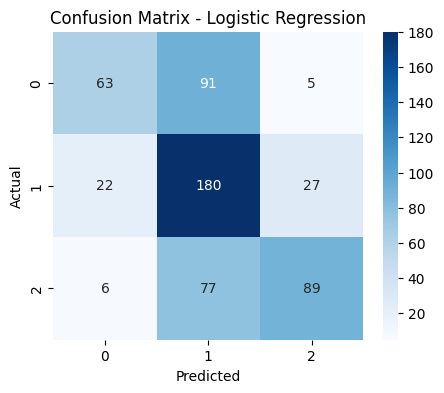

--- Support Vector Machine Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.18      0.29       159
           1       0.47      0.91      0.62       229
           2       0.82      0.36      0.50       172

    accuracy                           0.53       560
   macro avg       0.68      0.48      0.47       560
weighted avg       0.65      0.53      0.49       560

Accuracy: 0.5339
Confusion Matrix:


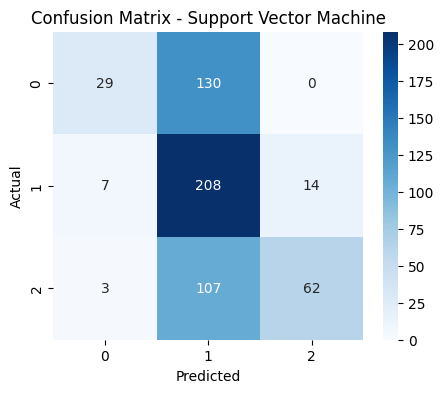

--- Random Forest Classifier Evaluation ---
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.26      0.39       159
           1       0.52      0.84      0.64       229
           2       0.70      0.52      0.60       172

    accuracy                           0.58       560
   macro avg       0.65      0.54      0.54       560
weighted avg       0.63      0.58      0.56       560

Accuracy: 0.5804
Confusion Matrix:


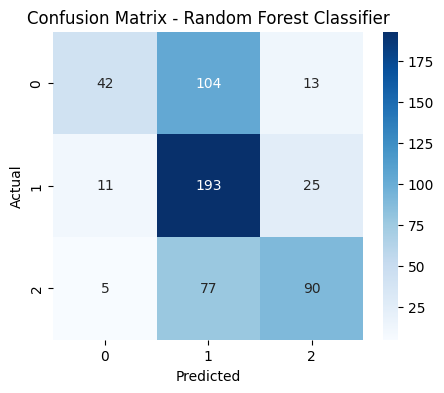

In [23]:
eval_model(logistic_model, X_test, y_test, model_name='Logistic Regression')
eval_model(svm_model, X_test, y_test, model_name='Support Vector Machine')
eval_model(random_forest_model, X_test, y_test, model_name='Random Forest Classifier')

### Save Models

In [24]:
from pickle import dump

dump(logistic_model, open('../models/sa_logistic_model.pkl', 'wb'))
dump(svm_model, open('../models/sa_svm_model.pkl', 'wb'))
dump(random_forest_model, open('../models/sa_random_forest_model.pkl', 'wb'))
dump(tfidf_model, open('../models/sa_tfidf_vectorizer.pkl', 'wb'))

# Sentiment Analysis of Twitter Data using DL models - LSTM

In [25]:
sample_df_dl = tsaDF.sample(frac=0.62, random_state=37)
sample_df_dl.head()

,textID,text,selected_text,sentiment
17957,890259f4c6,"Forced myself out of bed this morning, but fai...","Forced myself out of bed this morning, but fai...",negative
17566,6576ad08ff,__d make it go awayyyyy,__d make it go awayyyyy,neutral
1460,5fd17dc352,Ugh id better get up for work,Ugh id better get up for work,neutral
17479,cd3b1a5a25,Jeff & I are looking for long lasting love! Ju...,like,positive
3960,ef2ccb6b14,Amost there,Amost there,neutral


In [26]:
sample_df_dl.shape

(17038, 4)

### Clean and Preprocess Text Data for LSTM

In [27]:
sample_df_dl['sentiment'] = sample_df_dl['sentiment'].map({'positive': 2, 'neutral': 1, 'negative': 0})
sample_df_dl.head()

,textID,text,selected_text,sentiment
17957,890259f4c6,"Forced myself out of bed this morning, but fai...","Forced myself out of bed this morning, but fai...",0
17566,6576ad08ff,__d make it go awayyyyy,__d make it go awayyyyy,1
1460,5fd17dc352,Ugh id better get up for work,Ugh id better get up for work,1
17479,cd3b1a5a25,Jeff & I are looking for long lasting love! Ju...,like,2
3960,ef2ccb6b14,Amost there,Amost there,1


In [38]:
import contractions

def text_processing(text):
    text = clean_text(text)
    text = contractions.fix(text)
    
    return text

In [39]:
sample_df_dl['cleaned_text'] = sample_df_dl['text'].apply(text_processing)
sample_df_dl.head()

,textID,text,selected_text,sentiment,cleaned_text
17957,890259f4c6,"Forced myself out of bed this morning, but fai...","Forced myself out of bed this morning, but fai...",0,forced myself out of bed this morning but fail...
17566,6576ad08ff,__d make it go awayyyyy,__d make it go awayyyyy,1,d make it go awayyyyy
1460,5fd17dc352,Ugh id better get up for work,Ugh id better get up for work,1,ugh id better get up for work
17479,cd3b1a5a25,Jeff & I are looking for long lasting love! Ju...,like,2,jeff i are looking for long lasting love just...
3960,ef2ccb6b14,Amost there,Amost there,1,amost there


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#import padsequences, pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

#import embedding layer
from tensorflow.keras.layers import Embedding

#import tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

#import lstm
from tensorflow.keras.layers import LSTM

#### Split data into training and testing sets

In [41]:
X = sample_df_dl["cleaned_text"].values
y = sample_df_dl["sentiment"].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

### Train LSTM model

#### Tokenization and Padding of input sequences.

This is done to ensure that all input sequences have the same length, which is required for training the LSTM model. The `Tokenizer` class from Keras is used to convert the text data into sequences of integers, where each integer represents a unique word in the vocabulary. The `pad_sequences` function is then used to pad the sequences to a specified maximum length. This allows the model to process the input data in a consistent format, regardless of the original length of the text samples.

In [42]:
final_vocab = 5000
sentence_length = 120
embedding_dim = 120
tokenizer = Tokenizer(num_words=final_vocab)
tokenizer.fit_on_texts(X_train)

# print(tokenizer.word_index)

X_train_sequenced = tokenizer.texts_to_sequences(X_train)
X_test_sequenced = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequenced, maxlen=sentence_length, padding='pre', truncating='pre')
X_test_padded = pad_sequences(X_test_sequenced, maxlen=sentence_length, padding='pre', truncating='pre')

In [43]:
X_train_padded.shape, X_test_padded.shape

((12267, 120), (4771, 120))

In [44]:
y_train

array([1, 0, 2, ..., 1, 1, 1], shape=(12267,))

#### Adding layers to the LSTM model

1. **Embedding layer**
    - which will format the input data into fixed vector of same size
2. **LSTM layer** 
    - with 128 units and ReLU activation function, returning sequences
3. **Dropout layer**
    - with a rate of 0.5 to prevent overfitting
4. **LSTM layer**
    - with 64 units and ReLU activation function
5. **Dense output layer**
    - with 3 unit and softmax activation function for multi-class classification

In [45]:
model = Sequential()
model.add(Embedding(input_dim=final_vocab, output_dim=embedding_dim))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.5))
model.add(LSTM(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

Compile the model using <a href='#scce'>sparse categorical crossentropy</a> loss function for multi-class classification, Adam optimizer, and accuracy as a metric.

In [46]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=50, validation_data=(X_test_padded, y_test), verbose=1)

Epoch 1/10


246/246 ━━━━━━━━━━━━━━━━━━━━ 32s 116ms/step - accuracy: 0.4835 - loss: 1133498496.0000 - val_accuracy: 0.5714 - val_loss: 0.9631
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.6130 - loss: 25.4580 - val_accuracy: 0.5965 - val_loss: 0.8933
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.6485 - loss: 0.8130 - val_accuracy: 0.6055 - val_loss: 0.8750
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 28s 115ms/step - accuracy: 0.6782 - loss: 0.7484 - val_accuracy: 0.6085 - val_loss: 0.8665
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 28s 115ms/step - accuracy: 0.7016 - loss: 0.6986 - val_accuracy: 0.6148 - val_loss: 0.8848
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 28s 114ms/step - accuracy: 0.7043 - loss: 4.4452 - val_accuracy: 0.5995 - val_loss: 0.9802
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 28s 113ms/step - accuracy: 0.7174 - loss: 0.6881 - val_accuracy: 0.6036 - val_loss: 0.9086
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 28s 114ms/step - accuracy: 0.7406 - loss: 0.

In [48]:
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


In [49]:
y_pred_classes

array([2, 2, 0, ..., 0, 2, 1], shape=(4771,))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.51      0.56      1326
           1       0.54      0.70      0.61      1940
           2       0.73      0.58      0.64      1505

    accuracy                           0.61      4771
   macro avg       0.63      0.59      0.60      4771
weighted avg       0.62      0.61      0.61      4771

Accuracy: 0.6070


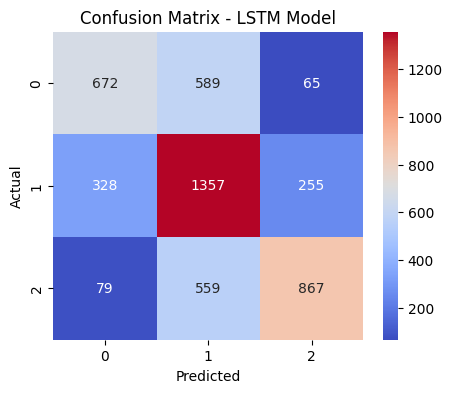

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification Report:')
print(classification_report(y_test, y_pred_classes, zero_division=1))

print(f'Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}')

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LSTM Model')
plt.show()

### Save LSTM model and tokenizer

In [51]:
model.save('../models/sentiment_lstm_model.keras')

In [52]:
dump(tokenizer, open('../models/tokenizer.pkl', 'wb'))